Explain the task (wine dataset, good = quality ≥ 7, goal = binary classifier).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib


In [3]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("winequality-red-selected-missing.csv")
df.head()


Saving winequality-red-selected-missing.csv to winequality-red-selected-missing.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,NaN,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1388 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1405 non-null   float64
 8   pH                    1389 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


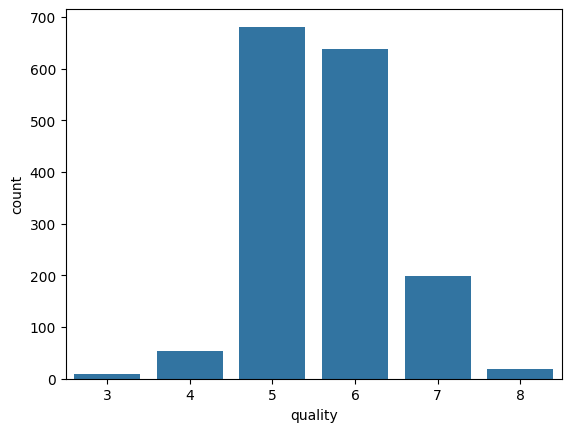

In [4]:
df.info()
df.describe()
df.isna().sum()

sns.countplot(x="quality", data=df)
plt.show()


In [5]:
df["good"] = (df["quality"] >= 7).astype(int)
df["good"].value_counts()


,count
good,
0,1382
1,217


In [6]:
X = df.drop(columns=["quality", "good"])
y = df["good"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [7]:
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced"))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.94      0.99      0.97       277
           1       0.93      0.60      0.73        43

    accuracy                           0.94       320
   macro avg       0.94      0.80      0.85       320
weighted avg       0.94      0.94      0.94       320

ROC AUC: 0.9479472756275711


In [9]:
import joblib

joblib.dump(pipeline, "wine_pipeline.joblib")


['wine_pipeline.joblib']

In [10]:
from google.colab import files
files.download("wine_pipeline.joblib")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>